In [64]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
import random

In [68]:
df = pd.read_excel('C:/Users/wnrrh/Desktop/data/개선/boho_final(클러스터링_final).xlsx',header=0)

In [69]:
df.keys()

Index(['시설명', '시간대구분', '주소', '시설종류', '구역지정수', 'CCTV 수', '도로표지판 수', '과속방지턱 수',
       '위도', '경도', 'CCTV설치여부', '보호구역도로폭', 'tmp', '속도', '도로명', '행정동', '시군구명',
       '총생활인구수', '사망자수', '중상자수', '경상자수', '부상신고자수', '가해운전자 차종', '피해운전자 차종',
       '피해운전자 연령', '사고 수', '통행량 도로명', '통행량', '면적', '인구밀도', '위험도',
       'cluster_label', '위험도군집', '일출/일몰', '등하교시간', '점심시간', '가해차종엔진125cc이상',
       '피해자어린이유무', '피해자교통수단탑승유무', '보호구역초등학교여부', '활동시간', '1차선이하', '표지판8개이하',
       '방지턱43개이하', '구역지정2개이하', 'CCTV3개이하', '피해자초고령여부', '가해차종4륜유무',
       '피해자연령38세이하', '피해차량승합차량여부', '일방통행여부', '방지턱16개이하', 'CCTV10개이하',
       '초등학교셔틀버스운영여부'],
      dtype='object')

In [70]:
df.drop(['시설명', '주소','위도', '경도','tmp','도로명', '행정동', '시군구명', '총생활인구수', '인구밀도', '사망자수', '중상자수', '경상자수', 
         '부상신고자수', '사고 수', '통행량 도로명', '통행량', '면적', '위험도군집','일출/일몰', '등하교시간', '점심시간',
       '가해차종엔진125cc이상', '피해자어린이유무', '피해자교통수단탑승유무', '보호구역초등학교여부', '활동시간', '위험도', '위험도군집',
       '1차선이하', '표지판8개이하', '방지턱43개이하', '구역지정2개이하', 'CCTV3개이하', '피해자초고령여부','속도',
       '가해차종4륜유무', '피해자연령38세이하', '피해차량승합차량여부', '일방통행여부', '방지턱16개이하',
       'CCTV10개이하', '초등학교셔틀버스운영여부'], axis=1, inplace=True)

In [71]:
df.keys()

Index(['시간대구분', '시설종류', '구역지정수', 'CCTV 수', '도로표지판 수', '과속방지턱 수', 'CCTV설치여부',
       '보호구역도로폭', '가해운전자 차종', '피해운전자 차종', '피해운전자 연령', 'cluster_label'],
      dtype='object')

In [72]:
X = df.iloc[:,:-1]
X=pd.get_dummies(X)
X["시설종류_유치원"]=X["시설종류_유치원"]+X["시설종류_유치원(병설)"]+X["시설종류_유치원(일반)"]
X.drop(["시설종류_유치원(병설)","시설종류_유치원(일반)"],axis=1,inplace=True)
y = df["cluster_label"]

In [73]:
X_, X_test, y_, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [74]:
X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=0.2, random_state=10)

In [75]:
X_train

,시간대구분,구역지정수,CCTV 수,도로표지판 수,과속방지턱 수,CCTV설치여부,보호구역도로폭,가해운전자 차종,피해운전자 차종,피해운전자 연령,시설종류_기타,시설종류_어린이집,시설종류_유치원,시설종류_초등학교,시설종류_특수학교,시설종류_학원
20823,22,1,0,8.024071,0,0,0.0,0.0,0.0,0.0,0,1,0,0,0,0
21814,18,0,0,15.400000,0,0,0.0,0.0,0.0,0.0,0,0,1,0,0,0
25365,9,2,0,6.000000,0,0,0.0,0.0,0.0,0.0,0,1,0,0,0,0
28000,1,2,0,0.000000,12,0,12.0,0.0,0.0,0.0,0,0,0,1,0,0
34228,20,0,0,8.000000,0,0,0.0,0.0,0.0,0.0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6867,3,2,0,6.000000,0,0,0.0,0.0,0.0,0.0,0,0,1,0,0,0
26447,10,2,0,8.024071,0,0,9.0,0.0,0.0,0.0,0,0,0,1,0,0
31007,8,1,0,25.250000,0,0,0.0,0.0,0.0,0.0,0,0,1,0,0,0
5071,6,1,0,15.000000,0,0,0.0,0.0,0.0,0.0,0,0,0,1,0,0


In [76]:
from imblearn.over_sampling import SMOTE
#Oversampling the data
smote = SMOTE(random_state = 10)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [77]:
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [78]:
# 모델 구조 정의하기
model = tf.keras.Sequential()  #순차적 계층화 준비
model.add(layers.Dense(16, input_shape=(17,)))  #입력 4개로부터 전달받는 8개 노드의 layer 생성
model.add(layers.Activation('relu'))  #ReLU 활성화함수 채택
model.add(layers.Dropout(0.1))        #dropout ratio=10% (배치 훈련시 10% arc 무시)

model.add(layers.Dense(8))         #4개 노드의 layer 생성
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.1))

model.add(layers.Dense(3))
model.add(layers.Activation('softmax')) #분류(classification)을 위해 softmax 함수 사용

# 모델 구축하기
model.compile(
    loss='categorical_crossentropy',  #다중 교차엔트로피
    optimizer="adam",   #최적화 기법 중 하나
    metrics=['mae'])  #정확도 측정

In [79]:
# 데이터 훈련하기
hist = model.fit(
    X_train, y_train,
    batch_size=100,  #100개에 한 번씩 업데이터 실행
    epochs=500,       #훈련 데이터셋을 총 50회 반복 실험. 단, 조기중지될 수 있음
    validation_split=0.1,  
      #validation data 분할 비율. 즉, 15000개 중에서 20%인 3000개를 validation용으로 분할
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)],  
      #'val_loss'를 monitor하여 감소하면 한 번 더(1) 참고 조기중지
    verbose=1)  #전 과정을 화면에 출력(1) 또는 미출력(0) 모드

# 테스트 데이터로 평가하기
score = model.evaluate(X_test, y_test)
print('test_loss: ', score[0]) # loss
print('test_acc: ', score[1]) # accuracy

Epoch 1/500


ValueError: in user code:

    C:\Users\wnrrh\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\wnrrh\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\wnrrh\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\wnrrh\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\wnrrh\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\wnrrh\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\wnrrh\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:747 train_step
        y_pred = self(x, training=True)
    C:\Users\wnrrh\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Users\wnrrh\anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:212 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_1 is incompatible with the layer: expected axis -1 of input shape to have value 17 but received input with shape [None, 16]


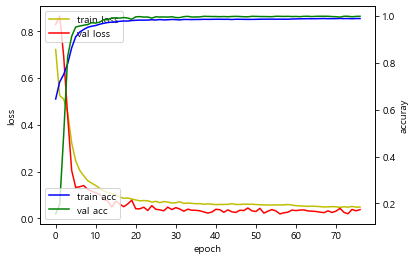

In [20]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [56]:
df_predict = pd.read_excel('C:/Users/wnrrh/Desktop/data/개선/위험도 3단계.xlsx')

In [57]:
X_new = df_predict.drop(['시설명', '주소','위도', '경도','tmp','도로명', '행정동', '시군구명', '총생활인구수', '인구밀도', '사망자수', '중상자수', '경상자수', 
         '부상신고자수', '사고 수', '통행량 도로명', '통행량', '면적', '위험도군집','일출/일몰', '등하교시간', '점심시간',
       '가해차종엔진125cc이상', '피해자어린이유무', '피해자교통수단탑승유무', '보호구역초등학교여부', '활동시간', '위험도', '위험도군집',
       '1차선이하', '표지판8개이하', '방지턱43개이하', '구역지정2개이하', 'CCTV3개이하', '피해자초고령여부',
       '가해차종4륜유무', '피해자연령38세이하', '피해차량승합차량여부', '일방통행여부', '방지턱16개이하',
       'CCTV10개이하', '초등학교셔틀버스운영여부'], axis=1)

In [58]:
X_new["cluster_label"]

0     15.603313
1     11.886527
2     15.899029
3     18.829941
4     15.514279
5     15.479379
6     15.609288
7     15.757107
8     16.956347
9     15.578838
10    16.369553
11    15.426169
Name: 위험도, dtype: float64

In [59]:
X_new = pd.get_dummies(X_new)

In [60]:
X_new.drop("cluster_label", axis=1, inplace=True)

In [42]:
X_new["시설종류_유치원"] = X_new["시설종류_유치원(병설)"]+X_new["시설종류_유치원(일반)"]
X_new["시설종류_기타"] = 0
X_new["시설종류_학원"] = 0
X_new["시설종류_특수학교"] = 0
X_new.drop(["시설종류_유치원(병설)","시설종류_유치원(일반)"],axis=1,inplace=True)

In [61]:
X_new

,시간대구분,구역지정수,CCTV 수,도로표지판 수,과속방지턱 수,CCTV설치여부,보호구역도로폭,속도,가해운전자 차종,피해운전자 차종,피해운전자 연령,시설종류_어린이집,시설종류_유치원(병설),시설종류_유치원(일반),시설종류_초등학교
0,9,1,0,10.000000,0,0,0.00000,24.917147,5.000000,8.000000,8.000000,0,0,0,1
1,16,4,0,13.000000,0,0,3.00000,20.254158,5.333333,5.666667,35.333333,0,0,0,1
2,10,5,9,6.000000,25,1,19.00000,21.203616,5.000000,8.000000,5.000000,0,0,0,1
3,17,2,0,0.000000,4,0,7.00000,21.103155,4.333333,6.000000,23.333333,0,0,0,1
4,19,2,0,10.000000,0,0,0.00000,18.317644,6.000000,8.000000,8.000000,1,0,0,0
5,17,4,0,8.000000,0,0,4.00000,19.692891,7.000000,8.000000,5.000000,0,0,1,0
6,14,6,0,0.000000,10,0,4.74705,20.953179,7.000000,8.000000,64.000000,0,0,0,1
7,17,2,0,15.500000,0,0,0.00000,25.276872,7.000000,8.000000,8.000000,0,1,0,0
8,16,4,5,8.024071,66,1,11.00000,24.082948,5.333333,6.666667,57.000000,0,0,0,1
9,17,1,0,8.024071,0,0,0.00000,24.472079,5.000000,8.000000,4.000000,1,0,0,0


In [62]:
X_new = X_new.iloc[:,:].astype(float)

In [63]:
y_pred = model.predict(X_new)
for i in range(len(y_pred)):
    y_prob = y_pred[i].argmax()
    print(y_prob)

ValueError: in user code:

    C:\Users\wnrrh\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1462 predict_function  *
        return step_function(self, iterator)
    C:\Users\wnrrh\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1452 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\wnrrh\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\wnrrh\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\wnrrh\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\wnrrh\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1445 run_step  **
        outputs = model.predict_step(data)
    C:\Users\wnrrh\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1418 predict_step
        return self(x, training=False)
    C:\Users\wnrrh\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Users\wnrrh\anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:212 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected axis -1 of input shape to have value 17 but received input with shape [None, 15]
